In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import confusion_matrix, accuracy_score


# from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
# import time
# import scipy.cluster.hierarchy as sch
# from sklearn.neighbors import NearestNeighbors


# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# source https://github.com/dhaitz/matplotlib-stylesheets

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.linear_model import SGDClassifier
# from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv("../../data/processed/aggregated_pueblos.csv")

In [6]:
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,vdsl_30mbps,fixed_wireless,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz"
0,1001,Álava,Alegría-Dulantzi,561.68570,-2.513507,42.84149,615,250,268,1005,...,0.29,1.00,0.99,0.0,1.00,0.81,0.15,1.00,0.01,0.00
1,1002,Álava,Amurrio,219.69100,-3.001022,43.05265,1826,588,862,2961,...,0.10,1.00,0.92,0.0,0.93,0.87,0.89,1.00,0.96,0.00
2,1003,Álava,Aramaio,381.87970,-2.566000,43.05400,218,113,108,349,...,0.21,0.94,0.85,0.0,0.89,0.78,0.84,1.00,0.60,0.00
3,1004,Álava,Artziniega,196.98080,-3.128209,43.12220,352,127,146,576,...,0.11,1.00,0.87,0.0,0.98,0.95,0.97,1.00,0.84,0.00
4,1006,Álava,Armiñón,463.58150,-2.872574,42.72305,42,20,18,96,...,0.00,0.53,0.87,0.0,0.99,0.84,0.90,0.96,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,50901,Zaragoza,Biel,754.24450,-0.936588,42.38749,6,8,16,37,...,0.00,1.00,0.78,0.0,1.00,0.46,0.00,0.85,0.00,0.00
7954,50902,Zaragoza,Marracos,404.73610,-0.776047,42.09059,4,2,4,33,...,0.00,0.95,0.00,0.0,0.99,0.00,0.00,0.39,0.00,0.00
7955,50903,Zaragoza,Villamayor de Gállego,231.12340,-0.773315,41.68518,405,224,320,789,...,0.00,1.00,0.76,0.0,1.00,0.77,0.71,1.00,0.99,0.05
7956,51001,Ceuta,Ceuta,13.47725,-5.316195,35.88829,18151,8386,10785,23963,...,0.23,1.00,0.99,0.0,1.00,0.99,0.98,1.00,0.99,0.77


In [7]:
df.describe()

,cmun,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,...,vdsl_30mbps,fixed_wireless,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz"
count,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7.958000e+03,7.958000e+03,7.958000e+03,...,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000
mean,26795.565971,618.862031,-3.072455,40.792047,949.765519,430.609073,644.103041,1.729262e+03,1.989599e+03,2.813688e+03,...,0.086470,0.807261,0.724310,0.028741,0.841138,0.520236,0.538647,0.968590,0.459966,0.063363
std,14893.017076,343.505105,2.935216,1.960306,7498.931852,3722.490616,6889.242609,1.462518e+04,1.672825e+04,2.332701e+04,...,0.118417,0.294853,0.361451,0.137520,0.304819,0.437829,0.427792,0.120394,0.446035,0.203762
min,1001.000000,0.000000,-18.024300,27.725500,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13094.250000,342.142850,-5.105667,39.912793,11.000000,7.000000,12.000000,3.700000e+01,7.800000e+01,8.300000e+01,...,0.000000,0.760000,0.660000,0.000000,0.890000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,26009.500000,673.797000,-3.236015,41.208620,56.000000,29.000000,47.000000,1.350000e+02,2.380000e+02,2.690000e+02,...,0.040000,0.960000,0.910000,0.000000,0.980000,0.730000,0.750000,1.000000,0.360000,0.000000
75%,41033.750000,862.641400,-1.164623,42.138723,364.750000,158.000000,235.000000,6.767500e+02,9.110000e+02,1.198750e+03,...,0.130000,1.000000,0.970000,0.000000,1.000000,0.950000,0.940000,1.000000,0.980000,0.000000
max,52001.000000,1818.995000,4.289603,43.769200,508215.000000,257247.000000,493715.000000,1.011765e+06,1.151474e+06,1.602924e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='total_population', ylabel='Count'>

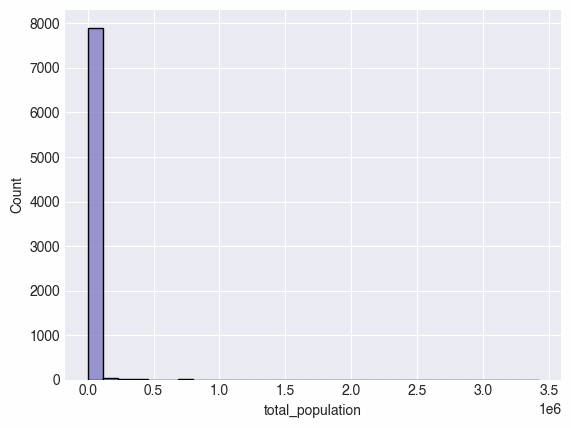

In [8]:
sns.histplot(df, x="total_population", bins=30)


<Axes: ylabel='total_population'>

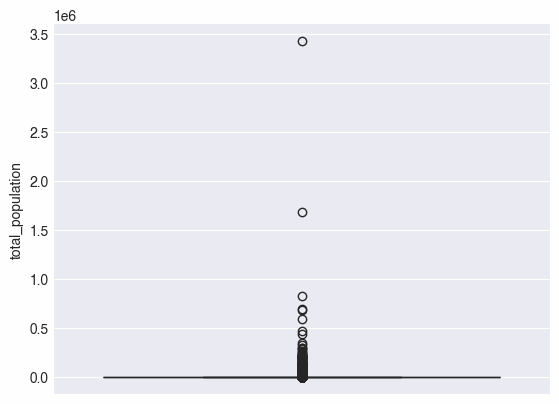

In [9]:
# Plotting the boxplot
sns.boxplot(df["total_population"], color="teal")

In [10]:
# Define function to print the whiskers of a boxplot

def calculate_whiskers(df, column):
    """
    Calculate the lower and upper whiskers for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to calculate whiskers for.

    Returns:
        tuple: (lower_whisker, upper_whisker)
    """
    # Get descriptive statistics for the column
    stats = df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1

    # Calculate the lower whisker
    lower_whisker = max(
        df[column][df[column] >= (Q1 - 1.5 * IQR)].min(), 
        df[column].min()
    )
    
    # Calculate the upper whisker
    upper_whisker = min(
        df[column][df[column] <= (Q3 + 1.5 * IQR)].max(), 
        df[column].max()
    )
    
    return lower_whisker, upper_whisker

In [11]:
lower, upper = calculate_whiskers(df, "total_population")
print("Upper Whisker total population", upper)

Upper Whisker total population 5666


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7958 entries, 0 to 7957
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cmun                       7958 non-null   int64  
 1   province                   7958 non-null   object 
 2   municipality               7958 non-null   object 
 3   altitude                   7958 non-null   float64
 4   longitude                  7958 non-null   float64
 5   latitude                   7958 non-null   float64
 6   0-17                       7958 non-null   int64  
 7   18-24                      7958 non-null   int64  
 8   25-34                      7958 non-null   int64  
 9   35-54                      7958 non-null   int64  
 10  55+                        7958 non-null   int64  
 11  male                       7958 non-null   int64  
 12  female                     7958 non-null   int64  
 13  total_population           7958 non-null   int64

In [13]:
df_cities = df.query("total_population > 20000")

In [14]:
title = "Cities in Spain"

lats = df_cities.latitude
lons = df_cities.longitude

fig = px.scatter_map(df_cities, 
                     lat=lats, 
                     lon=lons,
                     hover_data=["municipality"],
                     color_continuous_scale=px.colors.carto.Aggrnyl,
                     zoom=5,
                     size_max=50  # Increase max size of markers
                     )

# Adjust the size reference to make small points more visible
fig.update_traces(marker=dict(sizeref=1000))  # Decrease this value to make points larger

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.update_layout(
    coloraxis_colorbar=dict(title='asdf')
)
fig.update_layout(title="Major in Spain ")

fig.show()

In [15]:
df_cities.to_csv("../../data/processed/split_cities.csv")

In [16]:
df_cities

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,vdsl_30mbps,fixed_wireless,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz"
41,1059,Álava,Vitoria-Gasteiz,534.358200,-2.667893,42.84641,42947,17680,25583,77218,...,0.11,1.00,0.99,0.01,0.99,0.98,0.99,1.0,1.00,0.97
50,2003,Albacete,Albacete,685.957300,-1.860070,38.99765,30616,13617,19673,52956,...,0.08,0.99,0.97,0.90,1.00,0.95,0.92,1.0,0.99,0.96
56,2009,Albacete,Almansa,699.092300,-1.097517,38.86941,3927,1762,2567,7080,...,0.11,0.97,0.87,0.00,1.00,0.92,0.00,1.0,0.92,0.00
84,2037,Albacete,Hellín,571.843800,-1.703310,38.51216,5362,2671,3788,9081,...,0.06,0.98,0.96,0.68,1.00,0.92,0.91,1.0,0.95,0.07
128,2081,Albacete,Villarrobledo,728.529100,-2.607643,39.26726,4488,2121,2878,7453,...,0.05,0.87,0.79,0.00,0.99,0.79,0.72,1.0,0.81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,48902,Bizkaia,Erandio,7.186315,-2.946418,43.30746,3717,1704,2302,7817,...,0.16,1.00,0.98,0.24,0.98,0.97,0.97,1.0,1.00,0.90
7663,49275,Zamora,Zamora,657.165800,-5.743778,41.50368,7981,3927,5136,16108,...,0.20,1.00,0.98,0.85,0.98,0.95,0.95,1.0,1.00,0.51
7951,50297,Zaragoza,Zaragoza,204.002700,-0.876538,41.65629,111354,50925,74537,202056,...,0.15,1.00,0.99,0.61,1.00,0.99,0.98,1.0,0.99,0.96
7956,51001,Ceuta,Ceuta,13.477250,-5.316195,35.88829,18151,8386,10785,23963,...,0.23,1.00,0.99,0.00,1.00,0.99,0.98,1.0,0.99,0.77


In [17]:
df = df.query("total_population <= 6000")

<Axes: xlabel='total_population', ylabel='Count'>

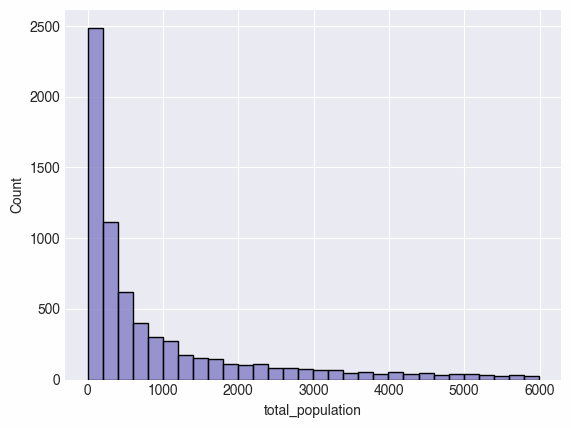

In [18]:
sns.histplot(df, x="total_population", bins=30)

<Axes: ylabel='total_population'>

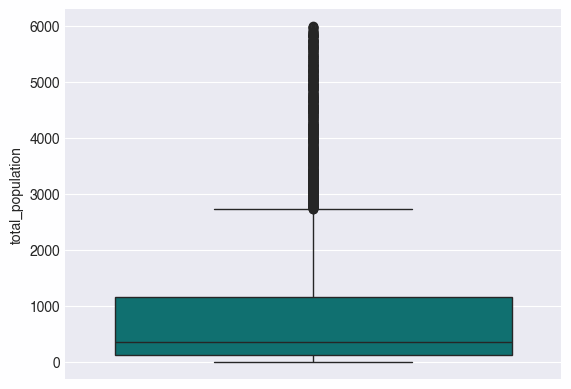

In [19]:
# Plotting the boxplot
sns.boxplot(df["total_population"], color="teal")

In [20]:
df


,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,vdsl_30mbps,fixed_wireless,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz"
0,1001,Álava,Alegría-Dulantzi,561.6857,-2.513507,42.84149,615,250,268,1005,...,0.29,1.00,0.99,0.0,1.00,0.81,0.15,1.00,0.01,0.00
2,1003,Álava,Aramaio,381.8797,-2.566000,43.05400,218,113,108,349,...,0.21,0.94,0.85,0.0,0.89,0.78,0.84,1.00,0.60,0.00
3,1004,Álava,Artziniega,196.9808,-3.128209,43.12220,352,127,146,576,...,0.11,1.00,0.87,0.0,0.98,0.95,0.97,1.00,0.84,0.00
4,1006,Álava,Armiñón,463.5815,-2.872574,42.72305,42,20,18,96,...,0.00,0.53,0.87,0.0,0.99,0.84,0.90,0.96,0.00,0.00
5,1009,Álava,Asparrena,631.6520,-2.321000,42.89567,229,110,145,444,...,0.12,0.95,0.87,0.0,0.97,0.86,0.88,1.00,0.95,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,50295,Zaragoza,Vistabella,755.5722,-1.153446,41.21913,0,2,4,7,...,0.00,0.10,0.67,0.0,1.00,0.00,0.00,0.87,0.00,0.00
7950,50296,Zaragoza,"Zaida, La",158.4921,-0.426948,41.32636,41,20,48,104,...,0.00,1.00,0.80,0.0,1.00,0.01,0.01,1.00,0.00,0.00
7953,50901,Zaragoza,Biel,754.2445,-0.936588,42.38749,6,8,16,37,...,0.00,1.00,0.78,0.0,1.00,0.46,0.00,0.85,0.00,0.00
7954,50902,Zaragoza,Marracos,404.7361,-0.776047,42.09059,4,2,4,33,...,0.00,0.95,0.00,0.0,0.99,0.00,0.00,0.39,0.00,0.00


In [21]:
df.columns

Index(['cmun', 'province', 'municipality', 'altitude', 'longitude', 'latitude',
       '0-17', '18-24', '25-34', '35-54', '55+', 'male', 'female',
       'total_population', 'n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other',
       'nearest_airport', 'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses', 'vdsl_30mbps',
       'fixed_wireless', 'ftth', 'hfc', 'reception_30mbps',
       'reception_100mbps', 'reception_1gbps', '4g', '5g', '5g_3,5ghz'],
      dtype='object')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'Burgos'),
  Text(1, 0, 'Salamanca'),
  Text(2, 0, 'Guadalajara'),
  Text(3, 0, 'Zaragoza'),
  Text(4, 0, 'Ávila'),
  Text(5, 0, 'Navarra'),
  Text(6, 0, 'Zamora'),
  Text(7, 0, 'Teruel'),
  Text(8, 0, 'Cuenca'),
  Text(9, 0, 'Lleida'),
  Text(10, 0, 'Valladolid'),
  Text(11, 0, 'Cáceres'),
  Text(12, 0, 'Segovia'),
  Text(13, 0, 'León'),
  Text(14, 0, 'Huesca'),
  Text(15, 0, 'Girona'),
  Text(16, 0, 'Palencia'),
  Text(17, 0, 'Barcelona'),
  Text(18, 0, 'Soria'),
  Text(19, 0, 'Toledo'),
  Text(20, 0, 'Valencia'),
  Text(21, 0, 'La Rioja'),
  Text(22, 0, 'Tarragona'),
  Text(23, 0, 'Badajoz'),
  Text(24, 0, 'Granada'),
  Text(25, 0, 'Castellón'),
  Text(26, 0, 'Madrid'),
  Text(27, 0, 'Ouren

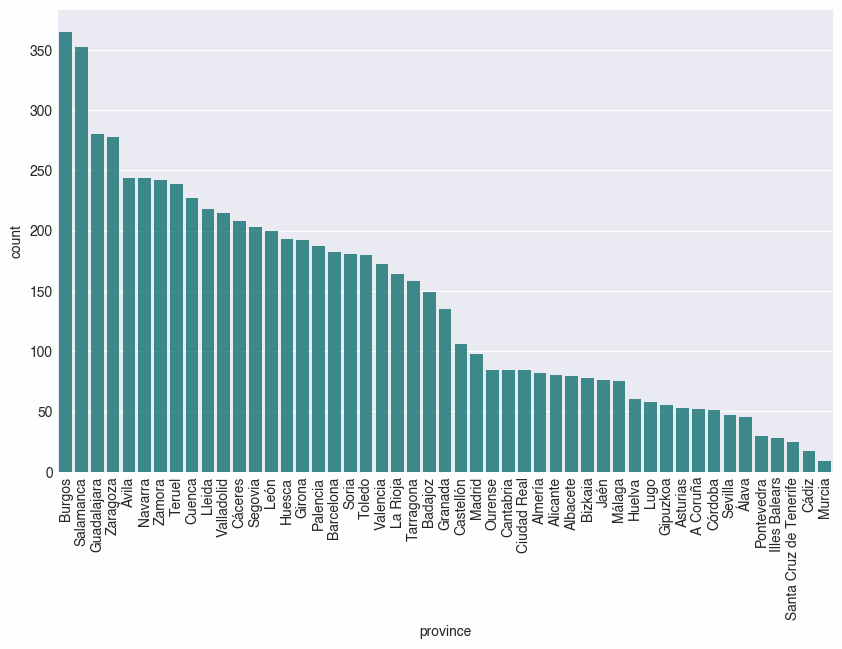

In [22]:
# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.countplot(data=df, x= "province",order=df["province"].value_counts().index, ax=ax1, color="teal", alpha = 0.8)
plt.xticks(rotation=90)


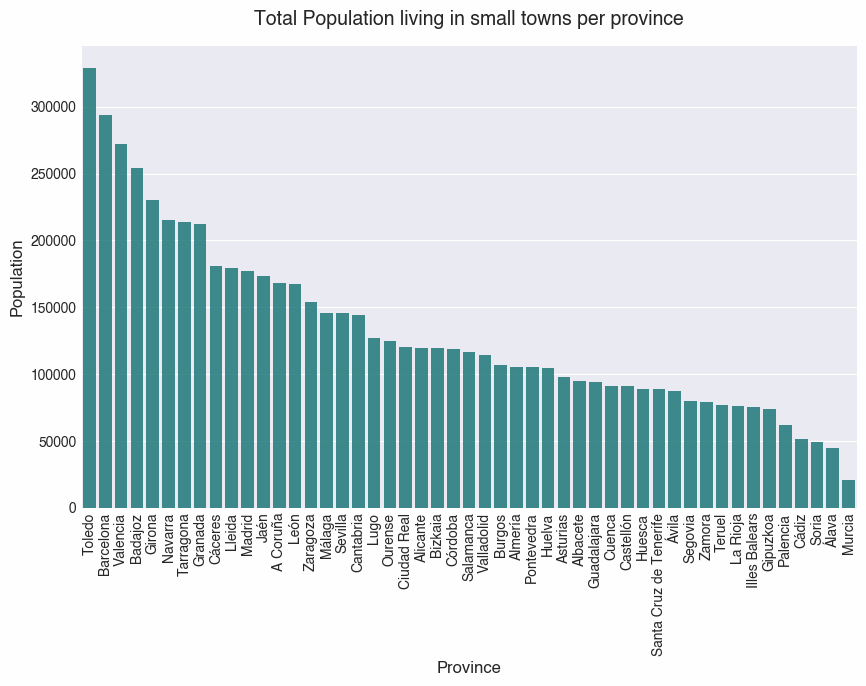

In [23]:
# Group by province and sum the total population
df_grouped = df.groupby("province", as_index=False)["total_population"].sum()

# Sort the grouped DataFrame by total_population in descending order
df_sorted = df_grouped.sort_values(by="total_population", ascending=False)

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with ordered categories
sns.barplot(x=df_sorted.province, y=df_sorted.total_population, ax=ax1, color="teal", order=df_sorted.province, alpha = 0.8)

ax1.set_ylabel("Population", fontsize=12)
ax1.set_xlabel("Province", fontsize=12)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Total Population living in small towns per province", fontsize=14, pad=15)

plt.show()



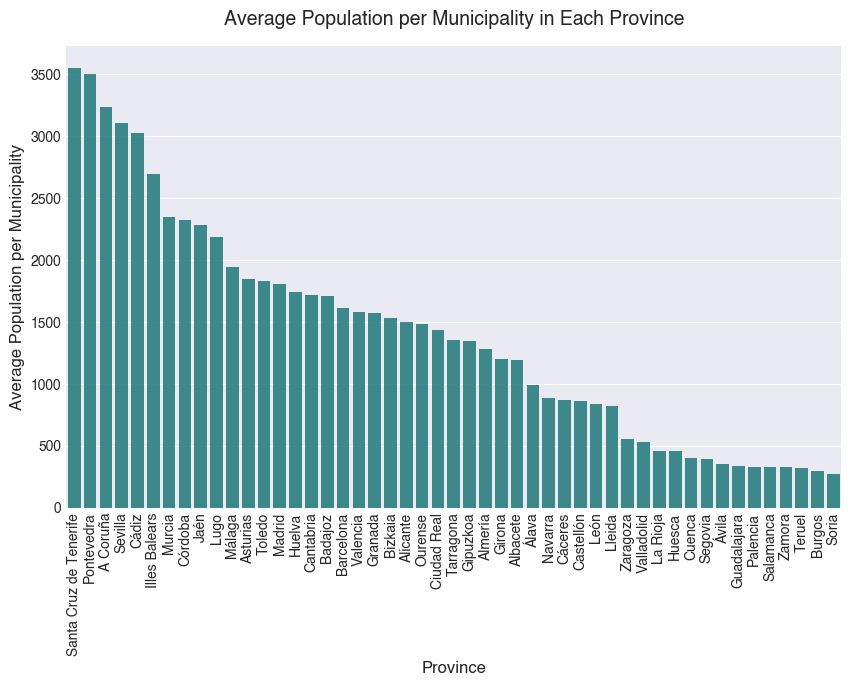

In [24]:
# Group by province and calculate the average population per municipality
df_grouped = df.groupby("province", as_index=False)["total_population"].mean()

# Sort the grouped DataFrame by average total_population in descending order
df_sorted = df_grouped.sort_values(by="total_population", ascending=False)

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with ordered categories
sns.barplot(x=df_sorted.province, y=df_sorted.total_population, ax=ax1, color="teal", order=df_sorted.province, alpha = 0.8)

ax1.set_ylabel("Average Population per Municipality", fontsize=12)
ax1.set_xlabel("Province", fontsize=12)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Average Population per Municipality in Each Province", fontsize=14, pad=15)

plt.show()


In [25]:
# Define function to categorize connectivity levels
def categorize_population(size):
    if size >= 3000:
        return "Big"
    elif size >= 500:
        return "Mid"
    elif size >= 100:
        return "Small"
    else:
        return "Very Small"

# Apply the function to create a new column
df["town_size"] = df["total_population"].apply(categorize_population)

/var/folders/w9/bt5d4t050m7fd91t2r7l1mlh0000gn/T/ipykernel_2940/169465249.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,fixed_wireless,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz",town_size
0,1001,Álava,Alegría-Dulantzi,561.6857,-2.513507,42.84149,615,250,268,1005,...,1.00,0.99,0.0,1.00,0.81,0.15,1.00,0.01,0.00,Mid
2,1003,Álava,Aramaio,381.8797,-2.566000,43.05400,218,113,108,349,...,0.94,0.85,0.0,0.89,0.78,0.84,1.00,0.60,0.00,Mid
3,1004,Álava,Artziniega,196.9808,-3.128209,43.12220,352,127,146,576,...,1.00,0.87,0.0,0.98,0.95,0.97,1.00,0.84,0.00,Mid
4,1006,Álava,Armiñón,463.5815,-2.872574,42.72305,42,20,18,96,...,0.53,0.87,0.0,0.99,0.84,0.90,0.96,0.00,0.00,Small
5,1009,Álava,Asparrena,631.6520,-2.321000,42.89567,229,110,145,444,...,0.95,0.87,0.0,0.97,0.86,0.88,1.00,0.95,0.00,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,50295,Zaragoza,Vistabella,755.5722,-1.153446,41.21913,0,2,4,7,...,0.10,0.67,0.0,1.00,0.00,0.00,0.87,0.00,0.00,Very Small
7950,50296,Zaragoza,"Zaida, La",158.4921,-0.426948,41.32636,41,20,48,104,...,1.00,0.80,0.0,1.00,0.01,0.01,1.00,0.00,0.00,Small
7953,50901,Zaragoza,Biel,754.2445,-0.936588,42.38749,6,8,16,37,...,1.00,0.78,0.0,1.00,0.46,0.00,0.85,0.00,0.00,Small
7954,50902,Zaragoza,Marracos,404.7361,-0.776047,42.09059,4,2,4,33,...,0.95,0.00,0.0,0.99,0.00,0.00,0.39,0.00,0.00,Very Small


In [27]:
order = ["Very Small", "Small", "Mid", "Big"]

<Axes: xlabel='town_size', ylabel='count'>

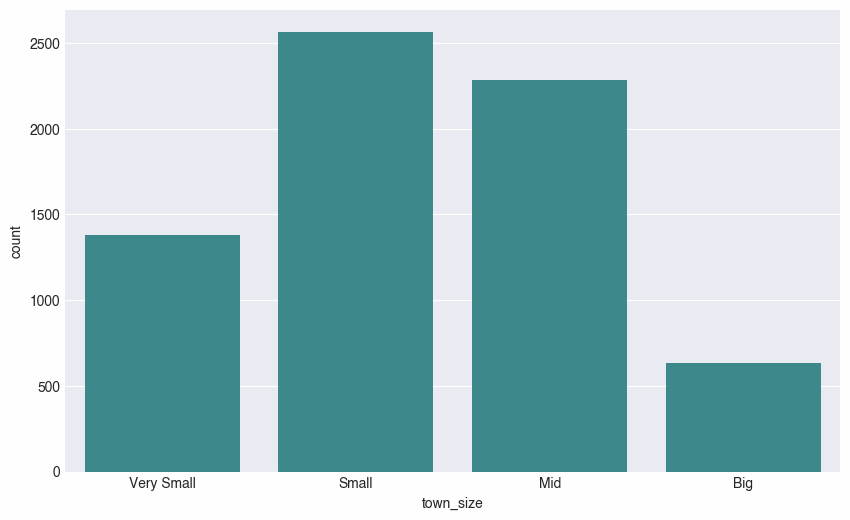

In [28]:
# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.countplot(data=df, x= "town_size",order=order, ax=ax1, color="teal", alpha = 0.8)

What questions would be useful to answer with this EDA?

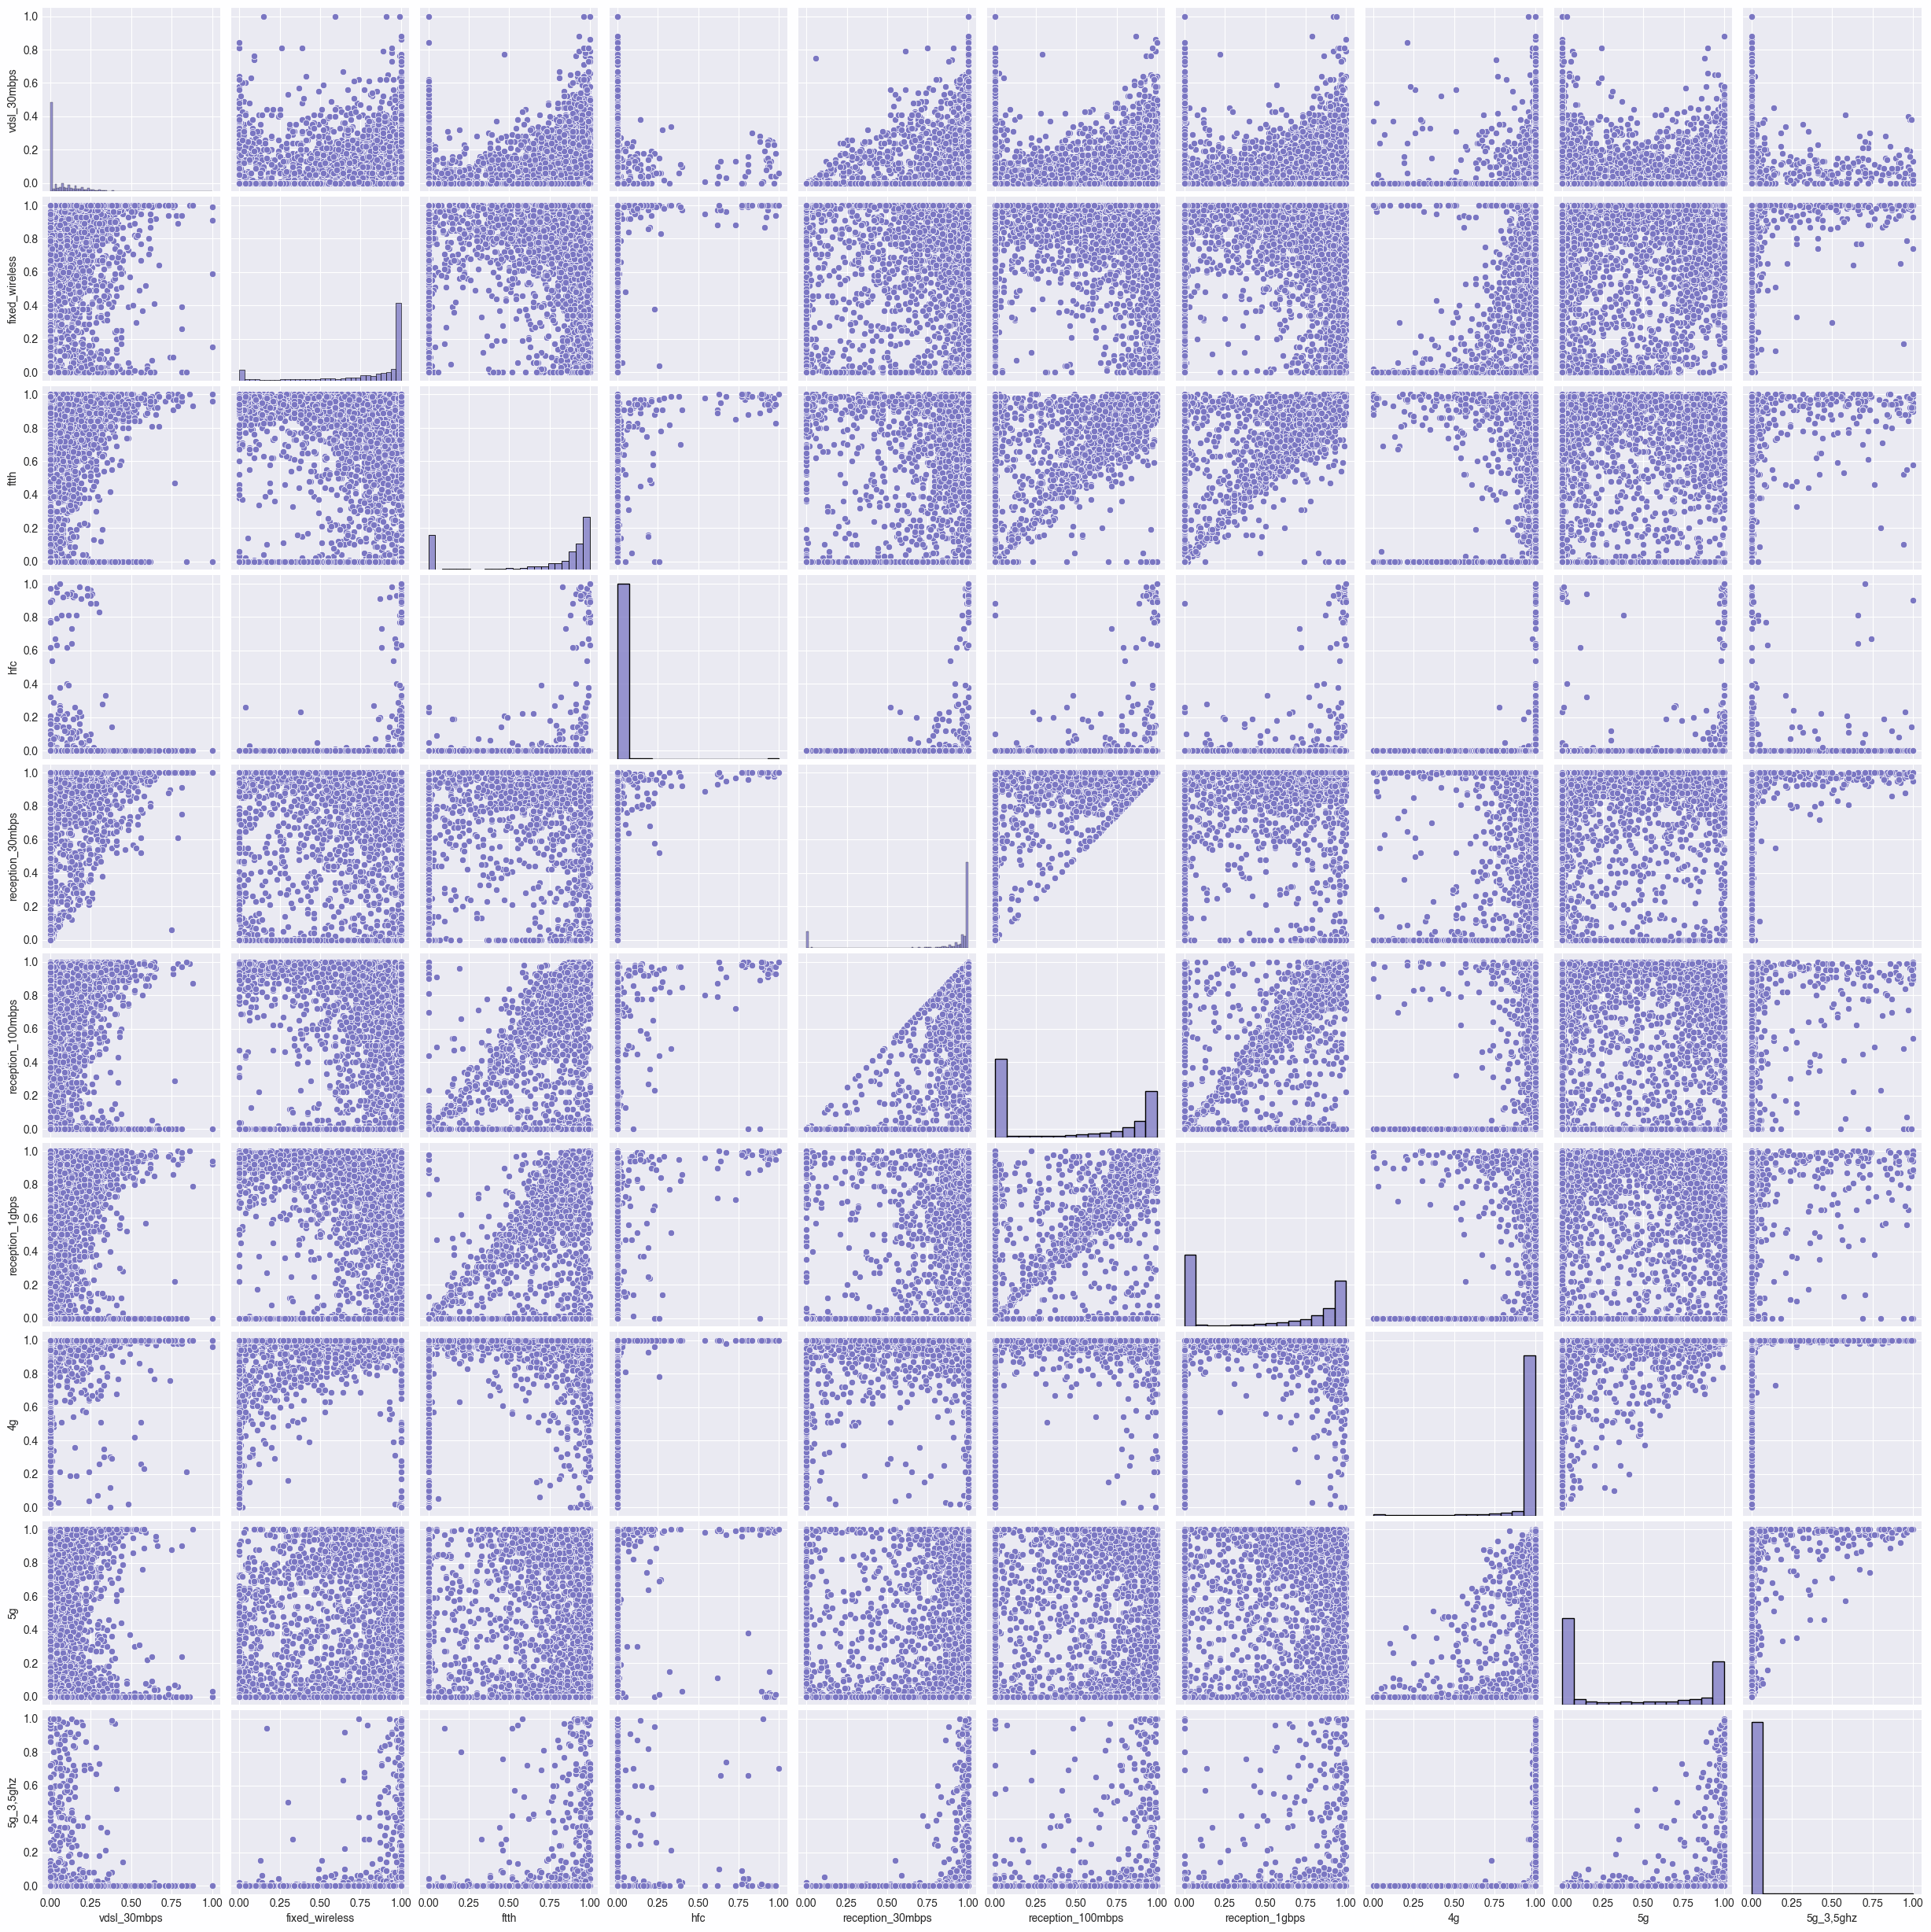

In [29]:
# Group by province and calculate the average population per municipality
df_connectivity = df[['vdsl_30mbps', 'fixed_wireless', 'ftth', 'hfc', 'reception_30mbps','reception_100mbps', 'reception_1gbps', '4g', '5g', '5g_3,5ghz']]

# Plot the bar chart with ordered categories
sns.pairplot(df_connectivity)


Meanings of the Connectivity Indicators:

Each of these refers to a different type of broadband or mobile network connectivity in a town. Here's what they mean:

vdsl_30mbps → Availability of VDSL (Very-high-bit-rate Digital Subscriber Line) at 30 Mbps. A faster version of DSL that uses telephone lines.
fixed_wireless → Percentage of coverage by Fixed Wireless Access (FWA), which provides broadband via radio signals instead of cables.
ftth → Fiber-to-the-Home (FTTH) availability, meaning direct fiber optic connections to residences (highest speed and reliability).
hfc → Hybrid Fiber-Coaxial (HFC) availability, a mix of fiber optics and coaxial cable (used in cable internet services).
reception_30mbps → Percentage of the area that can receive at least 30 Mbps (regardless of technology).
reception_100mbps → Percentage of the area that can receive at least 100 Mbps.
reception_1gbps → Percentage of the area that can receive at least 1 Gbps (1000 Mbps).
4g → Coverage of 4G mobile network.
5g → Coverage of 5G mobile network (general).
5g_3,5ghz → Coverage of 5G at 3.5 GHz, a specific frequency band that offers higher speeds and lower latency.

The 3 Most Important Metrics to Define Connectivity in a Town:

ftth (Fiber-to-the-Home)
Why? It's the gold standard for broadband, offering the fastest speeds, low latency, and high reliability.
Key Impact: Towns with high FTTH coverage have superior internet quality.

reception_100mbps or reception_1gbps
Why? This metric shows how much of the town has access to fast internet speeds (regardless of the technology).
Key Impact: Ensures people and businesses can get modern broadband speeds.

5g or 5g_3,5ghz
Why? 5G is essential for mobile and future-proof connectivity (low latency, high-speed mobile broadband).
Key Impact: Towns with strong 5G networks can support smart city applications, IoT, and next-gen mobile services.

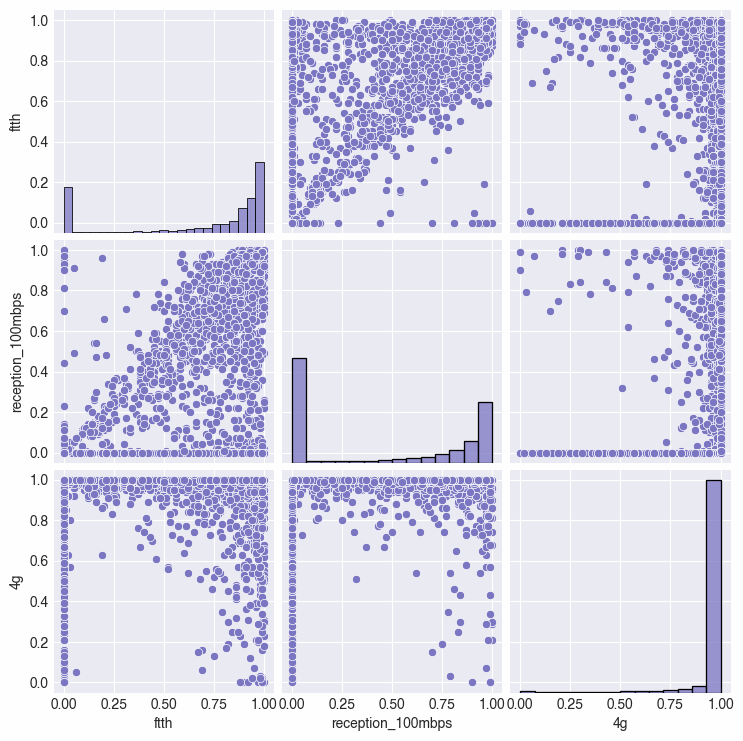

In [30]:
# Group by province and calculate the average population per municipality
df_connectivity = df[[ 'ftth','reception_100mbps', '4g']]

# Plot the bar chart with ordered categories
sns.pairplot(df_connectivity)


### **Adjusted Weight Distribution**
| **Factor**            | **New Weight (%)** | **Reasoning** |
|-----------------------|-------------------|--------------|
| `ftth`               | **50%**            | Fiber is the most important for stable, high-speed connectivity. |
| `reception_100mbps`  | **35%**            | Ensures fast broadband availability, even if not fiber. |
| `4g`                 | **15%**            | Still essential for mobile broadband, but not the primary factor. |

In [31]:
# Define new weights
weights = {
    'ftth': 0.5,
    'reception_100mbps': 0.35,
    '4g': 0.15
}

# Compute the adjusted Connectivity Score
df["connectivity_score"] = (
    df["ftth"] * weights["ftth"] +
    df["reception_100mbps"] * weights["reception_100mbps"] +
    df["4g"] * weights["4g"]
)


/var/folders/w9/bt5d4t050m7fd91t2r7l1mlh0000gn/T/ipykernel_2940/3575792084.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Connectivity Score Categories**
| **Score Range**  | **Category**          | **Description** |
|------------------|----------------------|----------------|
| **80 - 100**     | **Excellent**         | Strong fiber coverage and high-speed internet. |
| **60 - 79**      | **Good**              | Decent broadband with fiber or high-speed non-fiber options. |
| **40 - 59**      | **Moderate**          | Some high-speed coverage, but fiber may be limited. |
| **20 - 39**      | **Weak**              | Basic connectivity with limited high-speed access. |
| **0 - 19**       | **Poor**              | Very poor or no access to high-speed internet. |

In [32]:
# Define function to categorize connectivity levels
def categorize_connectivity(score):
    if score >= 0.8:
        return "Excellent"
    elif score >= 0.6:
        return "Good"
    elif score >= 0.4:
        return "Moderate"
    elif score >= 0.2:
        return "Weak"
    else:
        return "Poor"

# Apply the function to create a new column
df["connectivity_category"] = df["connectivity_score"].apply(categorize_connectivity)


/var/folders/w9/bt5d4t050m7fd91t2r7l1mlh0000gn/T/ipykernel_2940/2328812118.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz",town_size,connectivity_score,connectivity_category
0,1001,Álava,Alegría-Dulantzi,561.6857,-2.513507,42.84149,615,250,268,1005,...,0.0,1.00,0.81,0.15,1.00,0.01,0.00,Mid,0.9285,Excellent
2,1003,Álava,Aramaio,381.8797,-2.566000,43.05400,218,113,108,349,...,0.0,0.89,0.78,0.84,1.00,0.60,0.00,Mid,0.8480,Excellent
3,1004,Álava,Artziniega,196.9808,-3.128209,43.12220,352,127,146,576,...,0.0,0.98,0.95,0.97,1.00,0.84,0.00,Mid,0.9175,Excellent
4,1006,Álava,Armiñón,463.5815,-2.872574,42.72305,42,20,18,96,...,0.0,0.99,0.84,0.90,0.96,0.00,0.00,Small,0.8730,Excellent
5,1009,Álava,Asparrena,631.6520,-2.321000,42.89567,229,110,145,444,...,0.0,0.97,0.86,0.88,1.00,0.95,0.00,Mid,0.8860,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,50295,Zaragoza,Vistabella,755.5722,-1.153446,41.21913,0,2,4,7,...,0.0,1.00,0.00,0.00,0.87,0.00,0.00,Very Small,0.4655,Moderate
7950,50296,Zaragoza,"Zaida, La",158.4921,-0.426948,41.32636,41,20,48,104,...,0.0,1.00,0.01,0.01,1.00,0.00,0.00,Small,0.5535,Moderate
7953,50901,Zaragoza,Biel,754.2445,-0.936588,42.38749,6,8,16,37,...,0.0,1.00,0.46,0.00,0.85,0.00,0.00,Small,0.6785,Good
7954,50902,Zaragoza,Marracos,404.7361,-0.776047,42.09059,4,2,4,33,...,0.0,0.99,0.00,0.00,0.39,0.00,0.00,Very Small,0.0585,Poor


<Axes: xlabel='connectivity_category', ylabel='Count'>

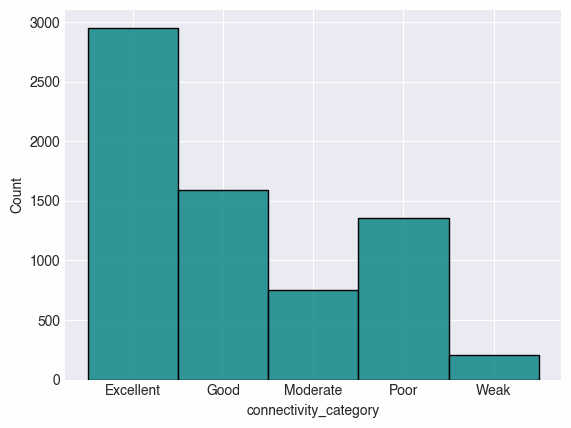

In [34]:
sns.histplot(df, x="connectivity_category", bins=30, color = "teal", alpha = 0.8)

In [35]:
df.drop(columns=["ftth", "hfc", "reception_30mbps", "reception_100mbps", "reception_1gbps", "4g", "5g", "5g_3,5ghz", 'vdsl_30mbps','fixed_wireless'], axis=1, inplace=True)

/var/folders/w9/bt5d4t050m7fd91t2r7l1mlh0000gn/T/ipykernel_2940/1572716538.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df[['n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other']].describe()

,n_industry,n_construction,n_info_communications,n_financial_insurance,n_real_estate,n_professional_technical,n_eduation_health_social,n_other
count,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000
mean,4.232114,7.082763,0.057846,0.095731,0.306717,0.975667,0.511438,0.832435
std,10.044808,14.925917,0.660546,0.946708,2.723468,7.302245,3.857352,5.832942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,162.000000,145.000000,16.000000,21.000000,70.000000,129.000000,63.000000,117.000000


In [37]:
title = "Villages in Spain"

lats = df.latitude
lons = df.longitude

fig = px.scatter_map(df, 
                     lat=lats, 
                     lon=lons,
                     hover_data=["municipality"],
                     color_continuous_scale=px.colors.carto.Aggrnyl,
                     zoom=5,
                     size_max=50  # Increase max size of markers
                     )
# Adjust the size reference to make small points more visible
fig.update_traces(marker=dict(sizeref=1000))  # Decrease this value to make points larger

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.update_layout(
    coloraxis_colorbar=dict(title='asdf')
)
fig.update_layout(title="Major in Spain ")


fig.show()

In [38]:
df[['latitude', 'longitude']].describe()

,latitude,longitude
count,6864.000000,6864.000000
mean,40.930681,-3.094790
std,1.747101,2.738941
min,27.725500,-18.024300
25%,40.131487,-5.090736
50%,41.257805,-3.246953
75%,42.157418,-1.345420
max,43.769200,4.049105


In [39]:
bins = {'lat': np.arange(df['latitude'].min(), df['latitude'].max(), 0.5), 'lon': np.arange(df['longitude'].min(), df['longitude'].max(), 0.5)}

1. make bins of lat, long
2. sort pueplos into the bins
3rd -> for each pueblo: have a look at 1 lower and 1 higer (lat, long)

In [40]:
df = df.copy()

df['lat_bin'] = pd.cut(df['latitude'], bins['lat'], labels=False, include_lowest=True)
df['lon_bin'] = pd.cut(df['longitude'], bins['lon'], labels=False, include_lowest=True)
df['lat_bin'] = df['lat_bin'].fillna(-1).astype(int)
df['lon_bin'] = df['lon_bin'].fillna(-1).astype(int)
df


,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,...,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin
0,1001,Álava,Alegría-Dulantzi,561.6857,-2.513507,42.84149,615,250,268,1005,...,0.171827,Dulantzi Mepu,Cfb,Oceanic Climate - Mild temperatures and consis...,1275.0,Mid,0.9285,Excellent,30,31
2,1003,Álava,Aramaio,381.8797,-2.566000,43.05400,218,113,108,349,...,0.483416,Aramaioko Haurreskola-Masusta Phe,Cfb,Oceanic Climate - Mild temperatures and consis...,738.0,Mid,0.8480,Excellent,30,30
3,1004,Álava,Artziniega,196.9808,-3.128209,43.12220,352,127,146,576,...,0.521370,Arteko Gure Ama Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1099.0,Mid,0.9175,Excellent,30,29
4,1006,Álava,Armiñón,463.5815,-2.872574,42.72305,42,20,18,96,...,3.973536,Unamunzaga Hlhi,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",180.0,Small,0.8730,Excellent,29,30
5,1009,Álava,Asparrena,631.6520,-2.321000,42.89567,229,110,145,444,...,0.991199,Araia Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1093.0,Mid,0.8860,Excellent,30,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,50295,Zaragoza,Vistabella,755.5722,-1.153446,41.21913,0,2,4,7,...,3.386114,C.R.A. La Cepa,Cfb,Oceanic Climate - Mild temperatures and consis...,269.0,Very Small,0.4655,Moderate,26,33
7950,50296,Zaragoza,"Zaida, La",158.4921,-0.426948,41.32636,41,20,48,104,...,6.784951,Daniel Federio,BSk,"Cold Semi-Arid Climate - Dry, but with lower t...",337.0,Small,0.5535,Moderate,27,35
7953,50901,Zaragoza,Biel,754.2445,-0.936588,42.38749,6,8,16,37,...,16.686948,ESCUELA MUNICIPAL DE M�SICA,Cfb,Oceanic Climate - Mild temperatures and consis...,498.0,Small,0.6785,Good,29,34
7954,50902,Zaragoza,Marracos,404.7361,-0.776047,42.09059,4,2,4,33,...,8.252614,DE GURREA DE G�LLEGO,Cfa,Humid Subtropical - Hot summers with year-roun...,74.0,Very Small,0.0585,Poor,28,34


In [41]:
from geopy.distance import geodesic

lon_max = df['lon_bin'].max()
lat_max = df['lat_bin'].max()

def get_towns_in_vicinity(row: pd.Series, distance):
    cmuns = []
    towns_in_vicinity = []

    if(row['lon_bin'] > 0 and row['lat_bin'] > 0 and row['lat_bin'] < lat_max and row['lon_bin'] < lon_max):
         for idx in range(row['lon_bin'] - 1, row['lon_bin'] + 1):
            for idy in range(row['lat_bin'] - 1, row['lat_bin'] + 1):
                cmuns.extend(df.loc[(df['lat_bin'] == idy) & (df['lon_bin'] == idx), 'cmun'].tolist())
    
    # get the origin coordinates
    origin = (row['latitude'], row['longitude'])

    # select rows for comparison
    new_df = df[df["cmun"].isin(cmuns)].copy()

    # calculate the distance for each town and write to list
    new_df["distance"] = [geodesic(origin, (lat, lon)).kilometers for lat, lon in zip(new_df["latitude"], new_df["longitude"])]
    new_df = new_df[new_df["distance"] < distance]
    
    return new_df['cmun'].to_list()





In [42]:
# df['towns'] = df.apply(lambda x: get_towns_in_vicinity(x), axis=1)
df['towns_in_vicinity'] = df.apply(lambda x: get_towns_in_vicinity(x, 20), axis=1)

In [51]:
df_economy = df[['n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other']]

# Define weights for each economic indicator (summing to 1)
economy_weights = {
    'n_industry': 0.2,
    'n_construction': 0.15,
    'n_info_communications': 0.1,
    'n_financial_insurance': 0.1,
    'n_real_estate': 0.1,
    'n_professional_technical': 0.15,
    'n_eduation_health_social': 0.1,
    'n_other': 0.1
}

# Calculate a weighted economy score using the defined weights
df["economy_score"] = df_economy.multiply(pd.Series(economy_weights)).sum(axis=1)


In [52]:
def combine_economy_scores(row):
    base_score = row["economy_score"]
    vicinity = row["towns_in_vicinity"]
    if vicinity:
        neighbor_scores = df.loc[df["cmun"].isin(vicinity), "economy_score"]
        if not neighbor_scores.empty:
            avg_neighbor_score = neighbor_scores.mean()
        else:
            avg_neighbor_score = 0
        return (base_score + avg_neighbor_score) / 2
    else:
        return base_score

df["economy_score_area"] = df.apply(combine_economy_scores, axis=1)

In [53]:
pd.set_option('display.max_columns', None)
df

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,n_industry,n_construction,n_info_communications,n_financial_insurance,n_real_estate,n_professional_technical,n_eduation_health_social,n_other,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin,towns_in_vicinity,economy_score,economy_score_combined,economy_score_area
0,1001,Álava,Alegría-Dulantzi,561.6857,-2.513507,42.84149,615,250,268,1005,827,1525,1440,2965,18.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,18.273217,Alegria-Dulantzi,0.819736,12.665248,Hospital Quirónsalud Vitoria,0.171827,Dulantzi Mepu,Cfb,Oceanic Climate - Mild temperatures and consis...,1275.0,Mid,0.9285,Excellent,30,31,"[1001, 1009, 1013, 1021, 1027, 1037, 1053, 105...",8.10,5.000000,5.000000
2,1003,Álava,Aramaio,381.8797,-2.566000,43.05400,218,113,108,349,592,709,671,1380,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,23.639652,Alegria-Dulantzi,23.176277,6.852571,Organización Sanitaria Integrada Alto Deba,0.483416,Aramaioko Haurreskola-Masusta Phe,Cfb,Oceanic Climate - Mild temperatures and consis...,738.0,Mid,0.8480,Excellent,30,30,"[1003, 1018, 20034, 20042, 20068, 48019, 48023...",1.80,3.594737,3.594737
3,1004,Álava,Artziniega,196.9808,-3.128209,43.12220,352,127,146,576,655,914,942,1856,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Bilbao,26.840606,Nanclares-Langraiz,43.021998,21.025189,Hospital De Basurto,0.521370,Arteko Gure Ama Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1099.0,Mid,0.9175,Excellent,30,29,"[1004, 1010, 9410, 9908, 48042]",3.10,4.355000,4.355000
4,1006,Álava,Armiñón,463.5815,-2.872574,42.72305,42,20,18,96,70,127,119,246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,20.846277,Manzanos,2.240750,11.270621,Hospital Santiago Apóstol,3.973536,Unamunzaga Hlhi,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",180.0,Small,0.8730,Excellent,29,30,"[1006, 1014, 1028, 1044, 1046, 1047, 1062, 901...",0.00,0.247727,0.247727
5,1009,Álava,Asparrena,631.6520,-2.321000,42.89567,229,110,145,444,685,814,799,1613,14.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Vitoria,33.555830,Araia,3.133054,20.900881,Hospital De Zumarraga,0.991199,Araia Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1093.0,Mid,0.8860,Excellent,30,31,"[1001, 1009, 1013, 1021, 1027, 1053, 1056, 106...",3.85,2.619231,2.619231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,50295,Zaragoza,Vistabella,755.5722,-1.153446,41.21913,0,2,4,7,38,29,22,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Zaragoza,50.735828,Villarreal De Huerva,11.493904,43.250875,Hospital Ernest Lluch Martin,3.386114,C.R.A. La Cepa,Cfb,Oceanic Climate - Mild temperatures and consis...,269.0,Very Small,0.4655,Moderate,26,33,"[44032, 44090, 44101, 44132, 44133, 44138, 441...",0.00,0.000000,0.000000
7950,50296,Zaragoza,"Zaida, La",158.4921,-0.426948,41.32636,41,20,48,104,218,217,214,431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Zaragoza,65.256214,La Zaida-Sastago,0.652260,39.953294,Hospital De Alcañiz,6.784951,Daniel Federio,BSk,"Cold Semi-Arid Climate - Dry, but with lower t...",337.0,Small,0.5535,Moderate,27,35,"[44031, 44067, 44122, 44129, 44191, 44205, 442...",0.00,0.551316,0.551316
7953,50901,Zaragoza,Biel,754.2445,-0.936588,42.38749,6,8,16,37,103,104,66,170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aeropuerto de Huesca Pirineos,61.667966,Riglos,17.531651,38.805217,Hospital De Jaca.Salud,16.686948,ESCUELA MUNICIPAL DE M�SICA,Cfb,Oceanic Climate - Mild temperatures and consis...,498.0,Small,0.6785,Good,29,34,"[22004, 22044, 22173, 31203, 50036, 50041, 501...",0.00,0.000000,0.000000
7954,50902,Zaragoza,Marracos,40

In [48]:
df.columns

Index(['cmun', 'province', 'municipality', 'altitude', 'longitude', 'latitude',
       '0-17', '18-24', '25-34', '35-54', '55+', 'male', 'female',
       'total_population', 'n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other',
       'nearest_airport', 'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses', 'town_size',
       'connectivity_score', 'connectivity_category', 'lat_bin', 'lon_bin',
       'towns_in_vicinity', 'economy_score', 'economy_score_combined'],
      dtype='object')

<Axes: xlabel='latitude', ylabel='Count'>

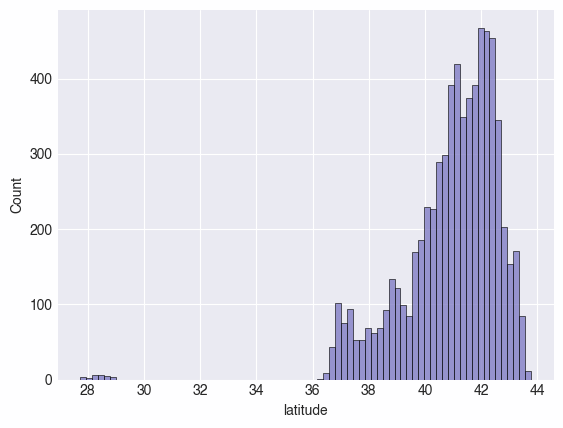

In [46]:
sns.histplot(df.latitude)

<Axes: xlabel='longitude', ylabel='Count'>

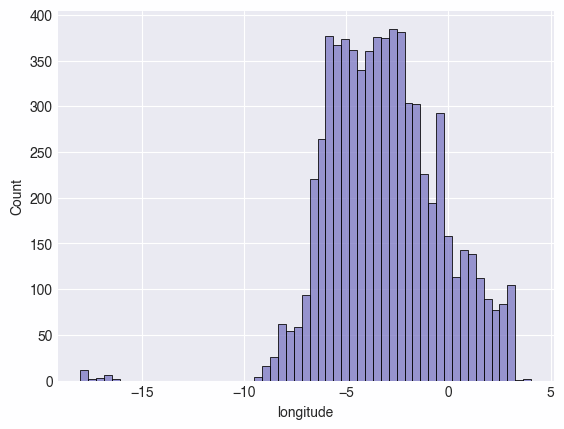

In [47]:
sns.histplot(df.longitude)

In [ ]:
df["towns_in_vicinity"] = df["towns_in_vicinity"].apply(
    lambda x: ", ".join(map(str, x)) if isinstance(x, list) else x
)

In [71]:
type(df.iloc[0]['towns_in_vicinity'])

str

In [72]:
df.to_csv("../../data/processed/aggregated_pueblos.csv", index=False)